Here comes some exploratory data analysis. Not too fancy, not really deep, just enjoying public datasets and jupyter notebook.

I downloaded the following datasets from World Bank on 01/09/2023:

 - Government expenditure on education, total (% of GDP) (SE.XPD.TOTL.GD.ZS)
 - GNI per capita, Atlas method (current USD) (NY.GNP.PCAP.CD)

In [1]:
import pandas as pd

edu = pd.read_csv("API_SE.XPD.TOTL.GD.ZS_DS2_en_csv_v2_5728785.csv")
edu.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.44296,5.85128,5.888270,5.491350,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.74492,4.83984,4.815085,4.821875,4.862555,4.83459,4.600084,4.608170,NaN,NaN
2,Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.45446,3.69522,3.255800,3.511980,3.373310,3.19979,3.213780,2.860859,NaN,NaN
3,Africa Western and Central,AFW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.94021,2.66667,3.057290,2.780580,3.430220,3.01322,3.023040,3.173885,NaN,NaN
4,Angola,AGO,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.43895,3.12292,3.486900,2.754940,2.466880,2.04470,1.927460,2.415200,NaN,NaN


In [ ]:
edu.info()

It is almost empty before 1971 and after 2020, so I let's just focus on the years in between.

In [2]:
string_list = ' '.join([str(item) for item in list(range(1960, 1971))]).split()
edu.drop(labels=string_list, axis = 1, inplace=True)
string_list = ' '.join([str(item) for item in list(range(2021, 2023))]).split()
edu.drop(labels=string_list, axis = 1, inplace=True)
edu.drop(labels=['Country Code', 'Indicator Name', 'Indicator Code'], axis = 1, inplace=True)

In [3]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   1971          53 non-null     float64
 2   1972          48 non-null     float64
 3   1973          54 non-null     float64
 4   1974          50 non-null     float64
 5   1975          59 non-null     float64
 6   1976          52 non-null     float64
 7   1977          53 non-null     float64
 8   1978          48 non-null     float64
 9   1979          59 non-null     float64
 10  1980          73 non-null     float64
 11  1981          61 non-null     float64
 12  1982          70 non-null     float64
 13  1983          62 non-null     float64
 14  1984          64 non-null     float64
 15  1985          61 non-null     float64
 16  1986          65 non-null     float64
 17  1987          59 non-null     float64
 18  1988          59 non-null     

Find some countries with enough data.

In [4]:
edu[edu.isnull().sum(axis=1) < 10]

,Country Name,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
9,Argentina,NaN,1.93620,1.78052,1.92352,1.84360,1.16564,1.71984,1.93555,2.40028,...,5.290630,5.345830,5.436610,5.361440,5.776110,5.545490,5.454320,4.877740,4.724170,5.016050
14,Austria,4.28235,4.45015,4.51547,4.65594,5.12796,5.23766,4.95401,5.15979,5.03816,...,5.592270,5.480400,5.547110,5.447620,5.456580,5.479620,5.371590,5.224520,5.212910,5.070000
35,Canada,7.71019,7.61541,7.03750,6.68963,6.44295,6.72099,6.73353,7.09767,6.71475,...,5.262050,4.692587,4.589010,4.843590,4.739380,4.816420,4.959970,4.888980,4.772930,5.170000
40,China,1.38874,1.60476,1.65082,1.76115,1.70850,1.81657,1.74954,1.95884,2.14805,...,3.521960,4.077430,3.852510,3.726640,3.824870,3.793620,3.667450,3.542490,3.540000,3.570000
49,Caribbean small states,NaN,NaN,3.63144,4.24897,5.22879,5.85833,6.02652,NaN,NaN,...,5.281330,5.331145,5.684940,5.673900,4.421210,4.634260,4.417835,4.358925,4.430865,4.860620
53,Cyprus,NaN,NaN,NaN,NaN,4.33502,3.81970,3.38549,3.31234,3.35313,...,6.538540,5.911855,6.483780,6.440500,6.326130,6.145410,5.718530,5.152854,5.250640,6.060000
58,Denmark,6.39356,6.48131,6.26611,6.58151,6.71313,NaN,5.67212,5.75347,5.58649,...,8.484860,7.237820,8.494430,7.634850,7.010415,7.476940,7.752440,6.792780,6.888580,6.380000
68,Euro area,3.72828,NaN,NaN,4.24204,4.73089,4.36060,NaN,4.34512,4.79691,...,5.123330,5.410220,5.342050,5.124000,4.909530,4.792670,4.871830,4.935870,4.910290,5.185000
75,Finland,5.33138,5.00819,5.09338,4.48231,5.03324,5.22833,NaN,NaN,4.79691,...,6.445050,7.148040,7.124040,7.102370,7.032080,6.851530,6.363110,6.275420,6.417110,5.880000
81,United Kingdom,5.03205,5.15938,5.44861,5.39100,6.26878,6.42422,6.06335,NaN,NaN,...,5.559600,5.659604,5.500780,5.564510,5.514110,5.375330,5.384990,5.167990,5.207750,5.530000


Choose a few countries from all around the world and format the dataframe:

In [5]:
indices = 9,14,35,40,53,119,177,180,184,194,233,264
countries="Argentina,Austria,Canada,China,Cyprus,Japan,Norway,New Zealand,Pakistan,Portugal,Thailand,Zambia".split(',')
edu = edu.filter(items = indices, axis=0)
edu.set_index(edu['Country Name'], inplace = True)
edu.drop('Country Name', axis=1, inplace = True)
edu = edu.transpose()
edu

Country Name,Argentina,Austria,Canada,China,Cyprus,Japan,Norway,New Zealand,Pakistan,Portugal,Thailand,Zambia
1971,NaN,4.28235,7.710190,1.38874,NaN,3.65630,NaN,NaN,1.654220,NaN,3.066220,6.09535
1972,1.93620,4.45015,7.615410,1.60476,NaN,4.01131,5.90406,NaN,1.568820,NaN,3.029150,5.94579
1973,1.78052,4.51547,7.037500,1.65082,NaN,4.04297,5.89172,4.75323,1.830420,1.633920,2.554250,5.48807
1974,1.92352,4.65594,6.689630,1.76115,NaN,4.04003,5.67366,4.74680,1.880650,1.935360,2.146870,4.87801
1975,1.84360,5.12796,6.442950,1.70850,4.335020,4.66899,5.55022,5.16753,1.980080,3.062460,2.380880,6.23854
1976,1.16564,5.23766,6.720990,1.81657,3.819700,4.85082,6.16360,5.45474,2.237940,3.078730,3.016720,6.02694
1977,1.71984,4.95401,6.733530,1.74954,3.385490,4.84027,5.97281,4.45267,2.149830,NaN,3.215120,5.69251
1978,1.93555,5.15979,7.097670,1.95884,3.312340,4.89441,6.44435,4.53253,2.204180,2.900480,NaN,4.74075
1979,2.40028,5.03816,6.714750,2.14805,3.353130,5.05745,NaN,4.46766,2.198070,2.699300,2.845290,4.15494
1980,2.60715,5.00897,6.484670,1.91190,3.426010,5.06872,5.78015,4.23265,2.130950,3.067430,2.574540,4.12671


Finally start plotting:

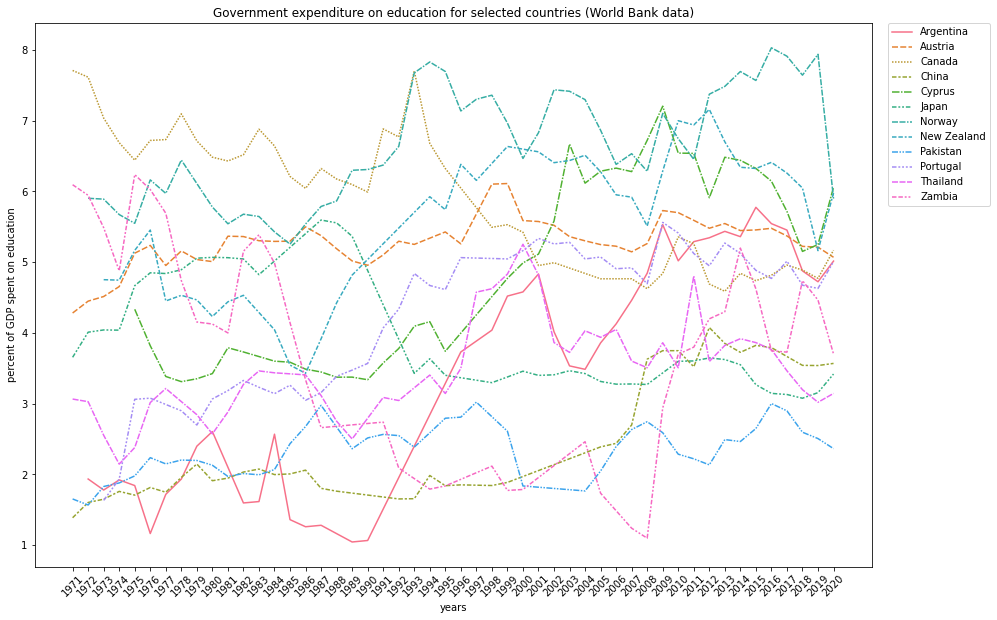

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
plt.xlabel('years')
plt.ylabel('percent of GDP spent on education')
plt.title('Government expenditure on education for selected countries (World Bank data)');
sns.lineplot(data=edu)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

Using plotly with cufflinks makes creating interactive plots super easy. Try zooming in on the plot by selecting a rectangle. You can set the zoom back with double click.

In [7]:
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import chart_studio.plotly as py
init_notebook_mode(connected=True)
cf.go_offline()

edu.iplot()

Now, there is significant difference between countries, and in the case of Zambia there is also a big change in time. I would like to compare the data from 2007 to 2020 with GDP figures.

In [8]:
gdp = pd.read_csv('API_NY.GNP.PCAP.CD_DS2_en_csv_v2_5729861.csv',  skiprows=4)
gdp = gdp[gdp['Country Name'].isin(countries)]
string_list = ' '.join([str(item) for item in list(range(1960, 1971))]).split()
gdp.drop(labels=string_list, axis = 1, inplace=True)
string_list = ' '.join([str(item) for item in list(range(2021, 2023))]).split()
gdp.drop(labels=string_list, axis = 1, inplace=True)
gdp.drop('Unnamed: 67', axis = 1, inplace=True)
gdp.drop(labels=['Country Code', 'Indicator Name', 'Indicator Code'], axis = 1, inplace=True)
gdp.set_index(gdp['Country Name'], inplace = True)
gdp.drop('Country Name', axis=1, inplace = True)
gdp = gdp.transpose()
gdp

Country Name,Argentina,Austria,Canada,China,Cyprus,Japan,Norway,New Zealand,Pakistan,Portugal,Thailand,Zambia
1971,1480.0,2320.0,NaN,130.0,NaN,2170.0,3580.0,NaN,180.0,1070.0,220.0,430.0
1972,1470.0,2760.0,NaN,130.0,NaN,2760.0,4230.0,NaN,170.0,1270.0,220.0,430.0
1973,1820.0,3580.0,NaN,160.0,NaN,3660.0,5320.0,NaN,150.0,1700.0,270.0,450.0
1974,2470.0,4650.0,NaN,180.0,NaN,4490.0,6750.0,NaN,150.0,2070.0,340.0,570.0
1975,2720.0,5540.0,NaN,200.0,NaN,5230.0,8380.0,NaN,160.0,2210.0,400.0,580.0
1976,2350.0,5980.0,NaN,190.0,NaN,5480.0,9150.0,NaN,180.0,2330.0,430.0,550.0
1977,2210.0,6660.0,NaN,190.0,1520.0,6020.0,9960.0,NaN,200.0,2430.0,470.0,500.0
1978,2480.0,7540.0,NaN,200.0,1800.0,7550.0,11110.0,NaN,230.0,2530.0,540.0,500.0
1979,2950.0,9620.0,NaN,210.0,2400.0,9570.0,13110.0,6530.0,270.0,2870.0,630.0,530.0
1980,3250.0,11460.0,NaN,220.0,3390.0,11000.0,15650.0,7670.0,310.0,3350.0,740.0,630.0


In [9]:
for country in countries:
    print("{c}: {corr}".format(c = country, corr = edu[country].corr(gdp[country])))

Argentina: 0.8842568546034404
Austria: 0.4869374225419133
Canada: -0.7898580753961849
China: 0.8882362935280832
Cyprus: 0.9171151583604268
Japan: -0.7036247727108081
Norway: 0.6098986797345695
New Zealand: 0.631211122047052
Pakistan: 0.4260318968070287
Portugal: 0.8467943581124399
Thailand: 0.30947138647722156
Zambia: 0.135651673157793


Wow! There is a tendency, but it is a wide range.
This data is asking more questions rather than telling a story, because the different histories of the countries. What I am really looking for is a more general pattern related to the development levels.

In [10]:
joined = edu.join(other=gdp,rsuffix='_gdp', sort=True)
points = pd.DataFrame(columns=['edu_percent','gdp_per_capita','country'])
for country in countries:
    edu_data_points = joined[country].values.tolist()
    gdp_data_points = joined[country+'_gdp'].values.tolist()
    data={'edu_percent':edu_data_points, 'gdp_per_capita':gdp_data_points, 'country':country}
    tmp = pd.DataFrame(data=data)
    points = points.append(tmp)

No handles with labels found to put in legend.


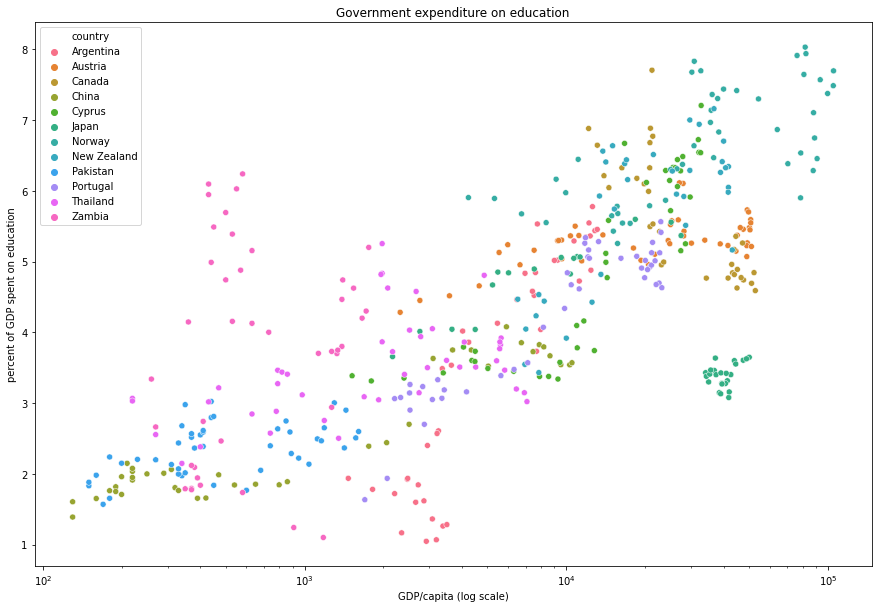

In [11]:
plt.figure(figsize=(15,10))
plt.xlabel('GDP/capita (log scale)')
plt.ylabel('percent of GDP spent on education')
plt.title('Government expenditure on education');
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.scatterplot(data=points, x='gdp_per_capita', y='edu_percent', hue='country')
plt.xscale('log')

In [12]:
points['gdp_per_capita'].corr(points['edu_percent'])

0.6104756191501473

In [13]:
points.iplot(kind='scatter', x='gdp_per_capita', y='edu_percent', mode='markers')